# LAB 9-2 합성곱 신경망으로 패션 MNIST 분류를 개선하기
***
### 실습 목표
> CNN을 이용하여 패션 MNIST 데이터를 분류하는 작업을 시도하자. 이 방법과 다층 퍼셉트론을 사용한 방법을 비교하고, 얼마나 성능이 개선되는지 확인해 보자
***

In [2]:
#!pip install tensorflow

     |████████████████████████████████| 588.3 MB 46 kB/s  eta 0:00:01    |██                              | 37.6 MB 6.1 MB/s eta 0:01:30     |███▋                            | 67.3 MB 7.8 MB/s eta 0:01:07     |█████▎                          | 96.2 MB 5.4 MB/s eta 0:01:32     |████████▏                       | 149.5 MB 6.2 MB/s eta 0:01:11     |████████████████▍               | 300.3 MB 6.2 MB/s eta 0:00:47     |████████████████▊               | 308.1 MB 6.2 MB/s eta 0:00:45     |█████████████████▍              | 318.8 MB 6.2 MB/s eta 0:00:44     |█████████████████▊              | 326.6 MB 5.3 MB/s eta 0:00:50     |██████████████████              | 332.5 MB 6.2 MB/s eta 0:00:42     |███████████████████▎            | 354.6 MB 6.2 MB/s eta 0:00:38     |████████████████████████▍       | 447.4 MB 6.1 MB/s eta 0:00:23     |█████████████████████████▎      | 464.1 MB 5.4 MB/s eta 0:00:24     |███████████████████████████▉    | 510.7 MB 5.4 MB/s eta 0:00:15     |█████████████████████████████▌  

In [3]:
# 패키지와 데이터 준비
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 패션 MNIST 데이터를 학습용 데이터, 테스트 데이터로 구분
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
# 학습 이미지 형태 출력
print(train_images.shape)
# 학습 레이블 출력
print(train_labels)
# 테스트 이미지 형태 출력
print(test_images.shape)

(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)


In [5]:
# 이미지의 채널의 개수에 따라 흑색조, 색감 등등 이미지의 형태가 나뉜다
# mnist데이터 셋의 이미지는 흑색조이기에 채널 정보가 없다
# 차원 수를 늘리는데 자주 사용하는 넘파이의 newaxis를 활용하여 마지막 에 차원을 채워준다
train_images = train_images[:, :, :, np.newaxis]
test_images = test_images[:, :, :, np.newaxis]

In [13]:
# 케라스의 Sequential 클래스에 계층을 쌓기
model = keras.models.Sequential([
    # 28*28 입력층을 통해 28*28 32장 Conv2D
    keras.layers.Conv2D(input_shape = (28, 28, 1),
                       kernel_size = (3,3), padding = 'same',
                       filters = 32),
    # 14*14 32장 MaxPooling
    keras.layers.MaxPooling2D((2, 2), strides=2),
    # 14*14 64장 Conv2D
    keras.layers.Conv2D(kernel_size = (3,3), padding ='same',
                       filters = 64),
    # 7*7 64장 MaxPooling
    keras.layers.MaxPooling2D((2, 2), strides=2),
    # 7*7 32장 Conv2D
    keras.layers.Conv2D(kernel_size = (3,3), padding ='same',
                       filters = 32),
    # 1568개의 데이터로 flatten화
    keras.layers.Flatten(),
    # 밀집연결 relu활용
    keras.layers.Dense(128, activation = 'relu'),
    # 밀집연결 relu활용
    keras.layers.Dense(32, activation = 'relu'),
    # 10개의 노트 Softmax 출력
    keras.layers.Dense(10, activation = 'softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          18464     
                                                                 
 flatten (Flatten)           (None, 1568)              0

In [14]:
# 모델 컴파일 후 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
# 학습에 과정에서 손실 값과 정확도 history에 기록 (15 에폭, 25% 검증에 사용)
history = model.fit(train_images, train_labels,
                   epochs=15, validation_split=0.25)

Epoch 1/15
1407/1407 [==============================] - 12s 8ms/step - loss: 1.0411 - accuracy: 0.6703 - val_loss: 0.7043 - val_accuracy: 0.7467
Epoch 2/15
1407/1407 [==============================] - 10s 7ms/step - loss: 0.5957 - accuracy: 0.7725 - val_loss: 0.5191 - val_accuracy: 0.8142
Epoch 3/15
1407/1407 [==============================] - 11s 8ms/step - loss: 0.4381 - accuracy: 0.8478 - val_loss: 0.4071 - val_accuracy: 0.8641
Epoch 4/15
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3435 - accuracy: 0.8826 - val_loss: 0.3591 - val_accuracy: 0.8707
Epoch 5/15
1407/1407 [==============================] - 11s 7ms/step - loss: 0.3202 - accuracy: 0.8898 - val_loss: 0.3958 - val_accuracy: 0.8731
Epoch 6/15
1407/1407 [==============================] - 10s 7ms/step - loss: 0.2840 - accuracy: 0.8997 - val_loss: 0.4104 - val_accuracy: 0.8789
Epoch 7/15
1407/1407 [==============================] - 10s 7ms/step - loss: 0.2733 - accuracy: 0.9052 - val_loss: 0.3873 - val_ac

Text(0.5, 1.0, 'loss of the model')

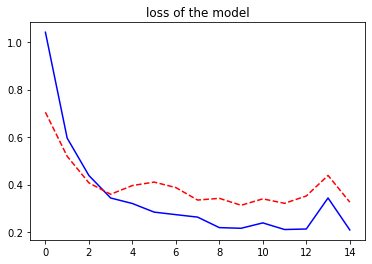

In [16]:
plt.plot(history.history['loss'], 'b-')
plt.plot(history.history['val_loss'], 'r--')
plt.title("loss of the model")

Text(0.5, 1.0, 'accuracy of the model')

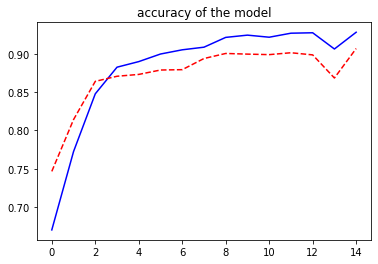

In [18]:
plt.plot(history.history['accuracy'], 'b-')
plt.plot(history.history['val_accuracy'], 'r--')
plt.title("accuracy of the model")
# 정확도가 일정 수준을 넘었고 훈련 모델의 정확도가 테스트 모델의 정확도보다 크게 나타나기에 과소적합이 일어 나지 않은 좋은 모델이라는 것을 볼 수 있다.

In [20]:
# 훈련 과정에 사용하지 않은 테스트용 데이터로 모델 정확도 측정
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.3286 - accuracy: 0.9051 - 808ms/epoch - 3ms/step
테스트 정확도: 0.9050999879837036


In [21]:
# 클래스를 나타내는 정수를 문자열로 바꾸기위한 문자열 리스트
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [22]:
# 0부터 999까지 랜덤숫자
randIdx = np.random.randint(0, 1000)

# 25개의 이미지 데이터
images = test_images[randIdx:randIdx+25]

# 각 예측별 가장 확률 높은 결과들 뽑아 저장
predictions = np.argmax(model.predict(images), axis=1)
# 저장된 예측 값들 출력
print(predictions)

1/1 [==============================] - 0s 107ms/step
[4 2 0 5 2 1 2 1 3 0 9 1 0 9 3 6 7 9 9 4 4 7 1 2 1]


In [26]:
# 이미지와 레이블을 각 행당 5개씩 보여주는 함수 생성
def plot_images(images, labels, images_per_row=5):
    n_images = len(images)
    # 몇개의 행인지
    n_rows = (n_images-1) // images_per_row + 1
    fig, ax = plt.subplots(n_rows, images_per_row,
                          figsize = (images_per_row * 2, n_rows * 2))
    for i in range(n_rows):
        for j in range(images_per_row):
            # 더이상 데이터가 없으면 정지
            if i*images_per_row + j >= n_images: break
            img_idx = i*images_per_row + j
            # 이미지를 28,28형식으로 재배치
            a_image = images[img_idx].reshape(28,28)
            if n_rows>1: axis = ax[i, j]
            # 행이 1개밖에 없으면 굳이 2차원으로 만들 필요가 없기에 조건식 사용
            else: axis = ax[j]
            # 그림이기에 x축 y축 안보이게 설정
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            # 각 레이블을 그림 제목에 설정
            label = class_names[labels[img_idx]]
            axis.set_title(label)
            # 이전에 2차원으로 만든 그림을 흑백으로 고해상도의 보간법을 적용
            axis.imshow(a_image, cmap='gray', interpolation='nearest')

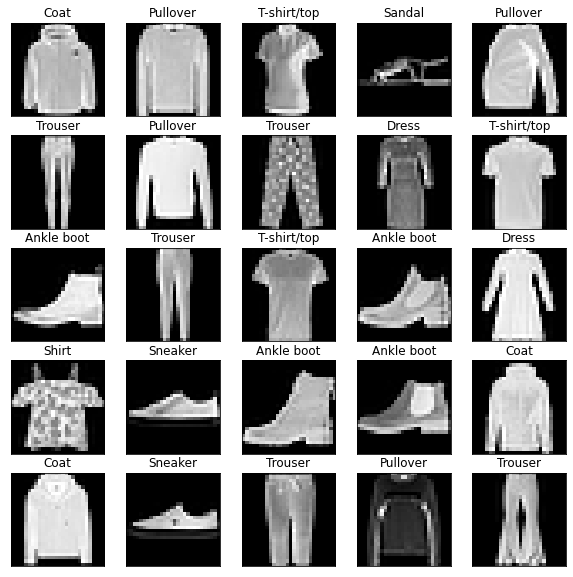

In [27]:
# 이전의 테스트 이미지 25개를 레이블과 함께 이미지 보여주기
plot_images(images, predictions, images_per_row = 5)

2/2 [==============================] - 0s 6ms/step


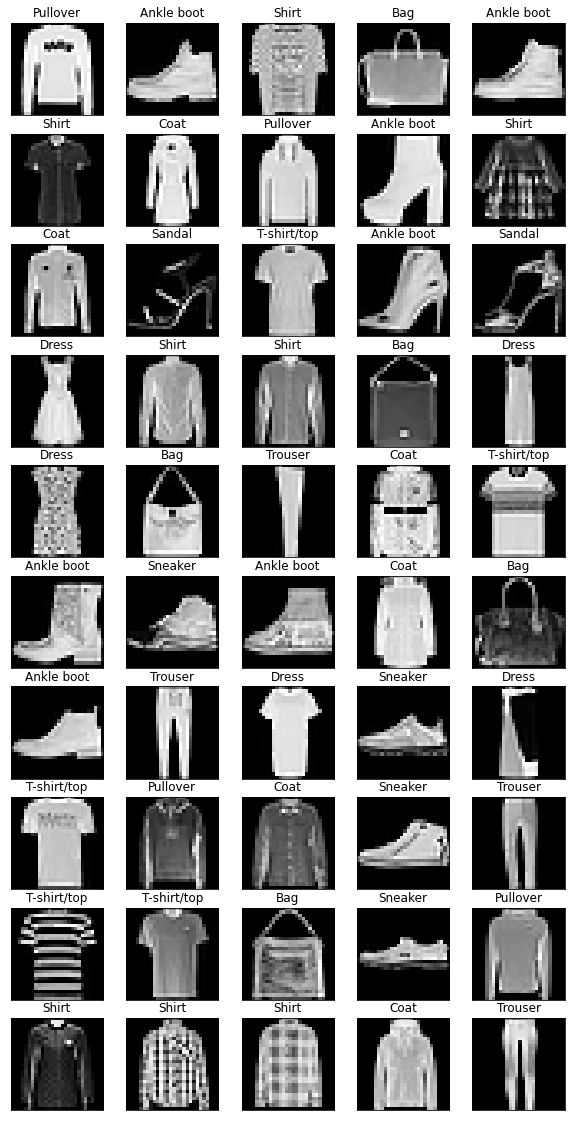

In [28]:
# 난수 발생과 예측을 반복하면 다른 예측 결과 확인 가능

# 0부터 999까지 랜덤숫자
randIdx = np.random.randint(0, 1000)

num = 50

# num개의 이미지 데이터
images = test_images[randIdx:randIdx+num]

# 각 예측별 가장 확률 높은 결과들 뽑아 저장
predictions = np.argmax(model.predict(images), axis=1)

# 이전의 테스트 이미지 num개를 레이블과 함께 이미지 보여주기
plot_images(images, predictions, images_per_row = 5)